# 🦜🔗LangChain이란?
---
- LangChain은 LLM(대형 언어 모델)을 기반으로 하는 Application을 개발하기 위한 Framework이다.
- Third party 통합이 가능하여 Open AI, Gemini 등 다양한 기업의 LLM 모델을 사용할 수 있다.
- `LangSmith`, `LangGraph`와 같은 플랫폼을 제공하여 LangChain의 테스트, 모니터링, 배포 등의 기능을 지원한다.
  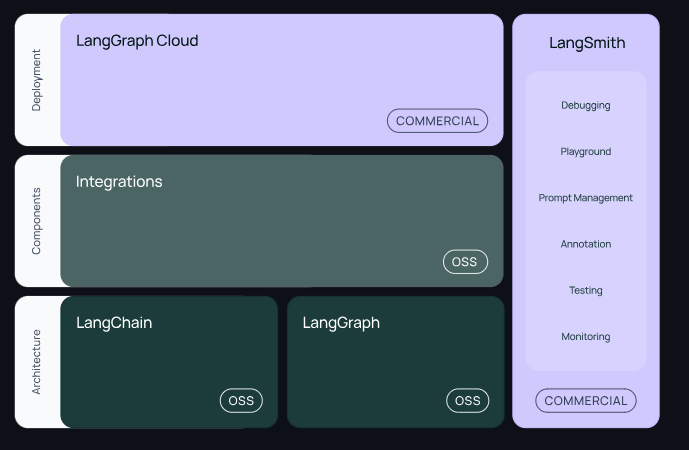

>**REF**
>
>https://github.com/langchain-ai/langchain
>
>https://python.langchain.com/v0.1/docs/integrations/chat/google_generative_ai/
>
>https://wikidocs.net/233345

# ⚙ 환경설정
- Open AI API 발급 : https://platform.openai.com/account/api-keys
- Google AI API 발급 : https://console.cloud.google.com/apis
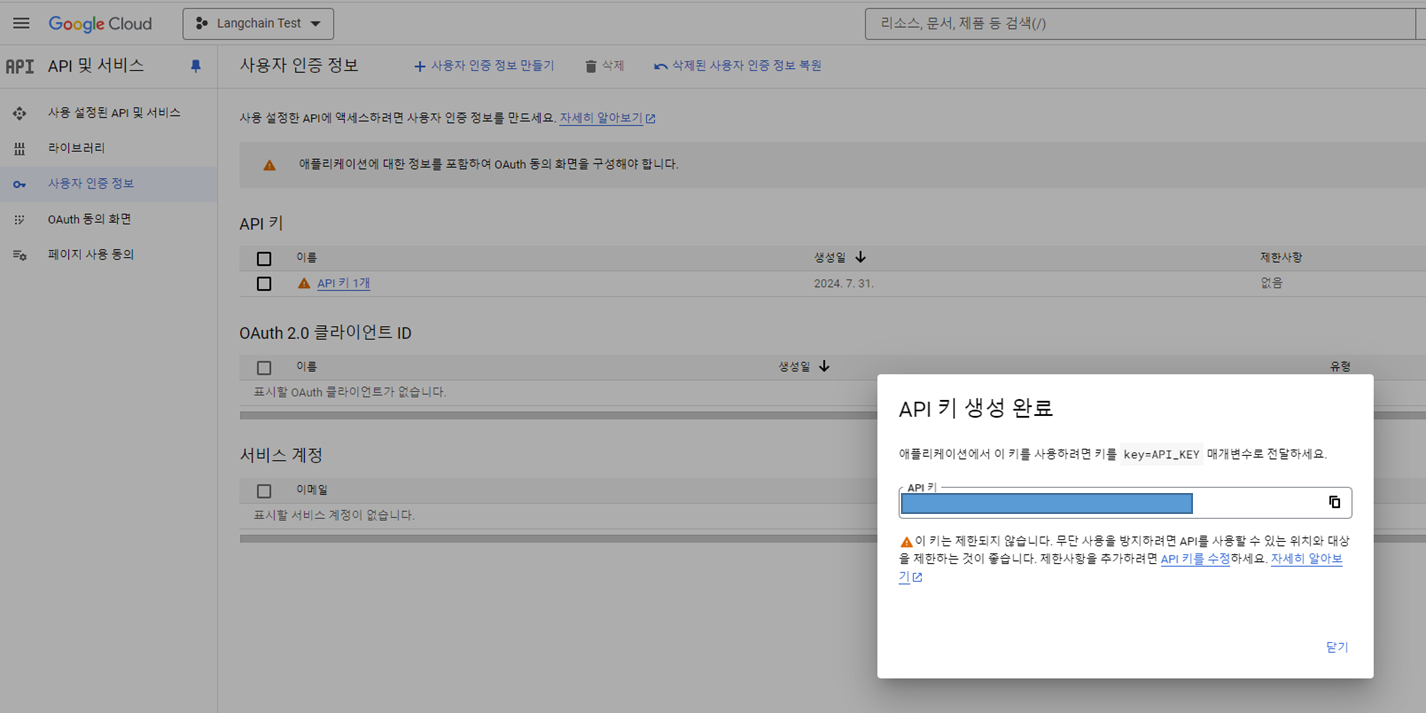

In [17]:
# 구글(Gemini) AI 모델 세팅
# https://python.langchain.com/v0.1/docs/integrations/chat/google_generative_ai/

%pip install --upgrade --quiet  langchain-google-genai pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import os
import getpass

os.environ['GOOGLE_API_KEY'] = getpass.getpass()

 ········


# 🌱 ChatGoogleCenerativeAI 사용예시

In [31]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro")
result = llm.invoke("2024년 올림픽 개최지는 어디야?") # 모델 호출
print(result.content)

파리, 프랑스


## Message 스키마 적용

In [58]:
from langchain_core.messages import HumanMessage, SystemMessage

llm = ChatGoogleGenerativeAI(model="gemini-pro",# 모델 종류
                             convert_system_message_to_human=True, #ChatGoogleGenerativeAI각 SystemMessage를 지원하지 않아 해당 파라미터를 True로 전달하여 SystemMessage 사용 가능
                             temperature=0.2, # 창의성 정도 0~1
                            )
message = [
    SystemMessage(content="앞으로 다, 나 까 로 말이 끝나도록 군대식으로 대답해."),
    HumanMessage(content="오늘 점심 메뉴 추천해봐"),
]
llm.invoke(message)

C:\Users\hyundai\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_google_genai\chat_models.py:350: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


AIMessage(content='오늘 점심 메뉴 추천은 다음과 같습니다:\n\n* 밥\n* 김치찌개\n* 돼지고기 구이\n* 깍두기\n* 미역국', response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-da44e963-b4eb-480a-be3f-eff31e20b2b3-0', usage_metadata={'input_tokens': 32, 'output_tokens': 44, 'total_tokens': 76})

## Steaming & Batching
`ChatGoogleGenerativeAI`는 자체적으로 스트리밍, 배치 기능을 제공한다.

In [64]:
# Streaing
for chunk in llm.stream("개발자에 관련된 시를 지어줘"):
    print(chunk.content)
    print("---")

C:\Users\hyundai\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_google_genai\chat_models.py:350: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


**코드의 마법사**

키보드 위에 손가
---
락이 춤추며,
코드의 마법을 짜내는 개발자.
논리의 흐름을 탐구
---
하며,
디지털 세계를 창조하는 예술가.

버그를 찾아내고, 솔루션을 찾으며,
그들의 마음은 끊임없이 움직인다.
알고리즘의 미로를 헤매며,
혁
---
신의 경계를 넓힌다.

그들의 손가락은 마법의 지팡이,
디지털 캔버스에 생명을 불어넣는다.
앱과 웹사이트, 게임과 소프트웨어,
그들의 창작물은 세계를 변화시킨다.

그들은 기술의 선구자,
미래를 형성하는 혁명가.
코드의 마법사, 개발자,
디지털 시대의 건축가.
---


In [66]:
# Batching
results = llm.batch(
    [
        "이번주에 등, 가슴 운동을 했는데 오늘 어떤 부위 운동을 할까?",
        "내일은 어떤 부위를 운동하는게 좋을까?"
    ]
)

for res in results:
    print(res.content)
    print("---")

C:\Users\hyundai\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_google_genai\chat_models.py:350: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
C:\Users\hyundai\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_google_genai\chat_models.py:350: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


등과 가슴 운동을 한 후 다음으로 운동할 부위는 다음과 같습니다.

* **하체:** 쿼드, 햄스트링, 글루트
* **어깨:** 프런트 델토이드, 사이드 델토이드, 리어 델토이드
* **팔:** 상완 이두근, 상완 삼두근, 전완
* **복부:** 크런치, 플랭크, 레그 레이즈

다음 사항을 고려하여 선택하세요.

* **회복 시간:** 등과 가슴 운동은 큰 근육군을 사용하므로 충분한 회복 시간이 필요합니다.
* **근육 그룹 균형:** 모든 주요 근육 그룹을 균형 잡히게 운동하는 것이 중요합니다.
* **개인적 선호도:** 어떤 운동을 즐기는지 고려하세요.

**예시 운동 루틴:**

* **하체:** 스쿼트, 레그 프레스, 레그 컬
* **어깨:** 오버헤드 프레스, 사이드 레이즈, 리어 델트 플라이
* **팔:** 바벨 컬, 트라이셉스 익스텐션, 해머 컬
* **복부:** 크런치, 플랭크, 러시안 트위스트
---
내일 운동할 부위를 선택할 때 고려해야 할 몇 가지 요인은 다음과 같습니다.

**근육 회복:**
* 최근에 운동한 부위는 휴식이 필요합니다.
* 일반적으로 근육은 운동 후 24~48시간 동안 회복됩니다.

**목표:**
* 특정 근육 그룹을 강화하거나 크기를 키우고 싶은지 고려하세요.
* 예를 들어, 팔을 키우고 싶다면 삼두근과 이두근을 운동하는 것이 좋습니다.

**시간 제약:**
* 전체 신체 운동을 할 시간이 있는지, 아니면 특정 부위에 집중할지 고려하세요.

**개인적 선호도:**
* 어떤 운동을 즐기는지 생각해 보세요.
* 즐기는 운동은 더 일관되게 수행할 가능성이 높습니다.

**내일 운동할 부위에 대한 몇 가지 제안:**

* **가슴과 삼두근:** 벤치 프레스, 인클라인 프레스, 삼두근 익스텐션
* **등과 이두근:** 풀업, 로우, 이두근 컬
* **하체:** 스쿼트, 런지, 레그 프레스
* **어깨:** 오버헤드 프레스, 사이드 레터럴 레이즈, 프런트 레이즈
* **복근:** 플랭크, 크런치, 레그 레이즈

**전체 신체 운동:

# 📑 Prompt Template
---
`PromptTemplate`은 사용자의 입력으로부터 변수를 생성해 특정 양식으로 변환하여 LLM에게 전달하기 위해 사용한다.

In [67]:
from langchain.prompts import PromptTemplate

template = '{company}이 무슨 기업인지 간략하게 소개해줘'
prompt = PromptTemplate(template=template, input_variables=['company'])

In [71]:
# 연결된 체인(Chain)객체 생성
llm_chain = prompt | llm

In [75]:
# 체인 실행: run() 
print(llm_chain.invoke('애플'))

C:\Users\hyundai\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_google_genai\chat_models.py:350: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


content='애플은 다음과 같은 분야에서 활동하는 다국적 기술 기업입니다.\n\n* **하드웨어:** iPhone, iPad, Mac, Apple Watch, AirPods\n* **소프트웨어:** iOS, macOS, watchOS, tvOS, iCloud\n* **서비스:** Apple Music, Apple TV+, Apple Arcade, Apple Fitness+, Apple Pay\n* **인공 지능:** Siri, Core ML, Create ML\n* **소매:** Apple Store, Apple Online Store' response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-33e53d27-62c2-4dae-a946-8164018c7196-0' usage_metadata={'input_tokens': 17, 'output_tokens': 105, 'total_tokens': 122}


In [78]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.prompts import PromptTemplate

llm = ChatGoogleGenerativeAI(model="gemini-pro",# 모델 종류
                             convert_system_message_to_human=True, #ChatGoogleGenerativeAI각 SystemMessage를 지원하지 않아 해당 파라미터를 True로 전달하여 SystemMessage 사용 가능
                             temperature=0.2, # 창의성 정도 0~1
                            )
message = [
    SystemMessage(content="{company}이 무슨 기업인지 간략하게 소개해줘"),
    HumanMessage(content="{}"),
]

# 연결된 체인(Chain)객체 생성
llm_chain = prompt | llm

print(llm_chain.invoke('애플'))

C:\Users\hyundai\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_google_genai\chat_models.py:350: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


content='애플은 다음과 같은 분야에서 제품과 서비스를 제공하는 다국적 기술 기업입니다.\n\n* **하드웨어:** iPhone, iPad, Mac, Apple Watch, AirPods\n* **소프트웨어:** iOS, macOS, iPadOS, watchOS, tvOS\n* **서비스:** Apple Music, Apple TV+, Apple Arcade, iCloud, Apple Pay\n\n애플은 혁신적인 제품, 사용자 친화적인 인터페이스, 강력한 브랜드 인지도로 유명합니다. 1976년에 설립된 애플은 현재 세계에서 가장 가치 있는 기업 중 하나입니다.' response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-34d06547-a476-4b5c-8ff4-9e84f23c1a12-0' usage_metadata={'input_tokens': 17, 'output_tokens': 141, 'total_tokens': 158}


## 🔬 Output Parser
---
`OutputParser`는 llm 모델의 반환 값 중 content를 파싱하며 `LCEL(LangChain Expression Language)`를 구성하기 위해 사용한다.

In [100]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

In [101]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

llm = ChatGoogleGenerativeAI(model="gemini-pro",# 모델 종류
                             convert_system_message_to_human=True, #ChatGoogleGenerativeAI각 SystemMessage를 지원하지 않아 해당 파라미터를 True로 전달하여 SystemMessage 사용 가능
                             temperature=0.2, # 창의성 정도 0~1
                            )

template = '{company}이 무슨 기업인지 간략하게 소개해줘'
prompt = PromptTemplate(template=template, input_variables=['company'])
output_parser = StrOutputParser()

# 연결된 체인(Chain)객체 생성
llm_chain = prompt | llm | output_parser

print(llm_chain.invoke({'company': '애플'}))

C:\Users\hyundai\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_google_genai\chat_models.py:350: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


애플은 다음과 같은 분야에서 활동하는 다국적 기술 기업입니다.

* **소비자 전자 제품:** iPhone, iPad, Mac, Apple Watch, Apple TV
* **소프트웨어:** iOS, macOS, watchOS, tvOS
* **온라인 서비스:** App Store, Apple Music, iCloud, Apple Pay
* **인공 지능:** Siri, Core ML
* **하드웨어 설계:** Apple Silicon 칩, M-시리즈 칩


# 🦜🛠LangSmith 연결
---

- `LangSmith`는 LLM Application 모니터링, 테스트 지원, 배포 지원 도구이다.
- 프로젝트 및 API Key를 생성하고 `.env` 파일에 아래의 4개 값을 추가하면 동작하는 LLM Application을 LangSmith와 연동할 수 있다.
- 추후 `RAG` 구축 시 어떤 문서가 llm 모델에 전달되는지 또한 모니터링이 가능하다.
- https://smith.langchain.com/

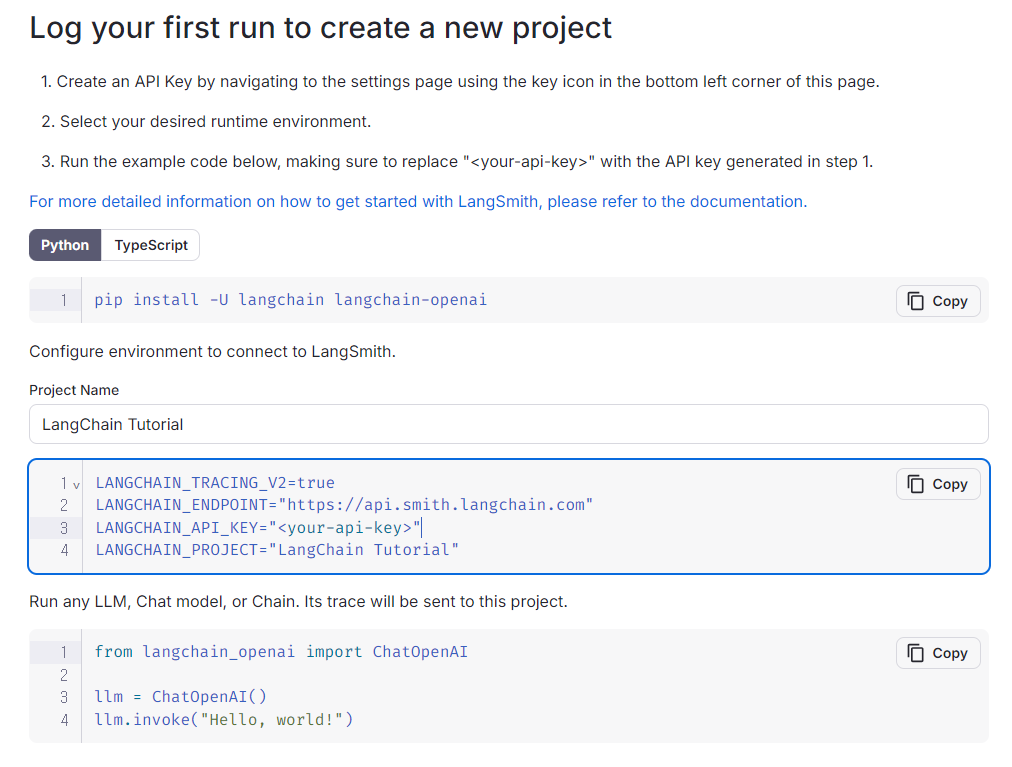

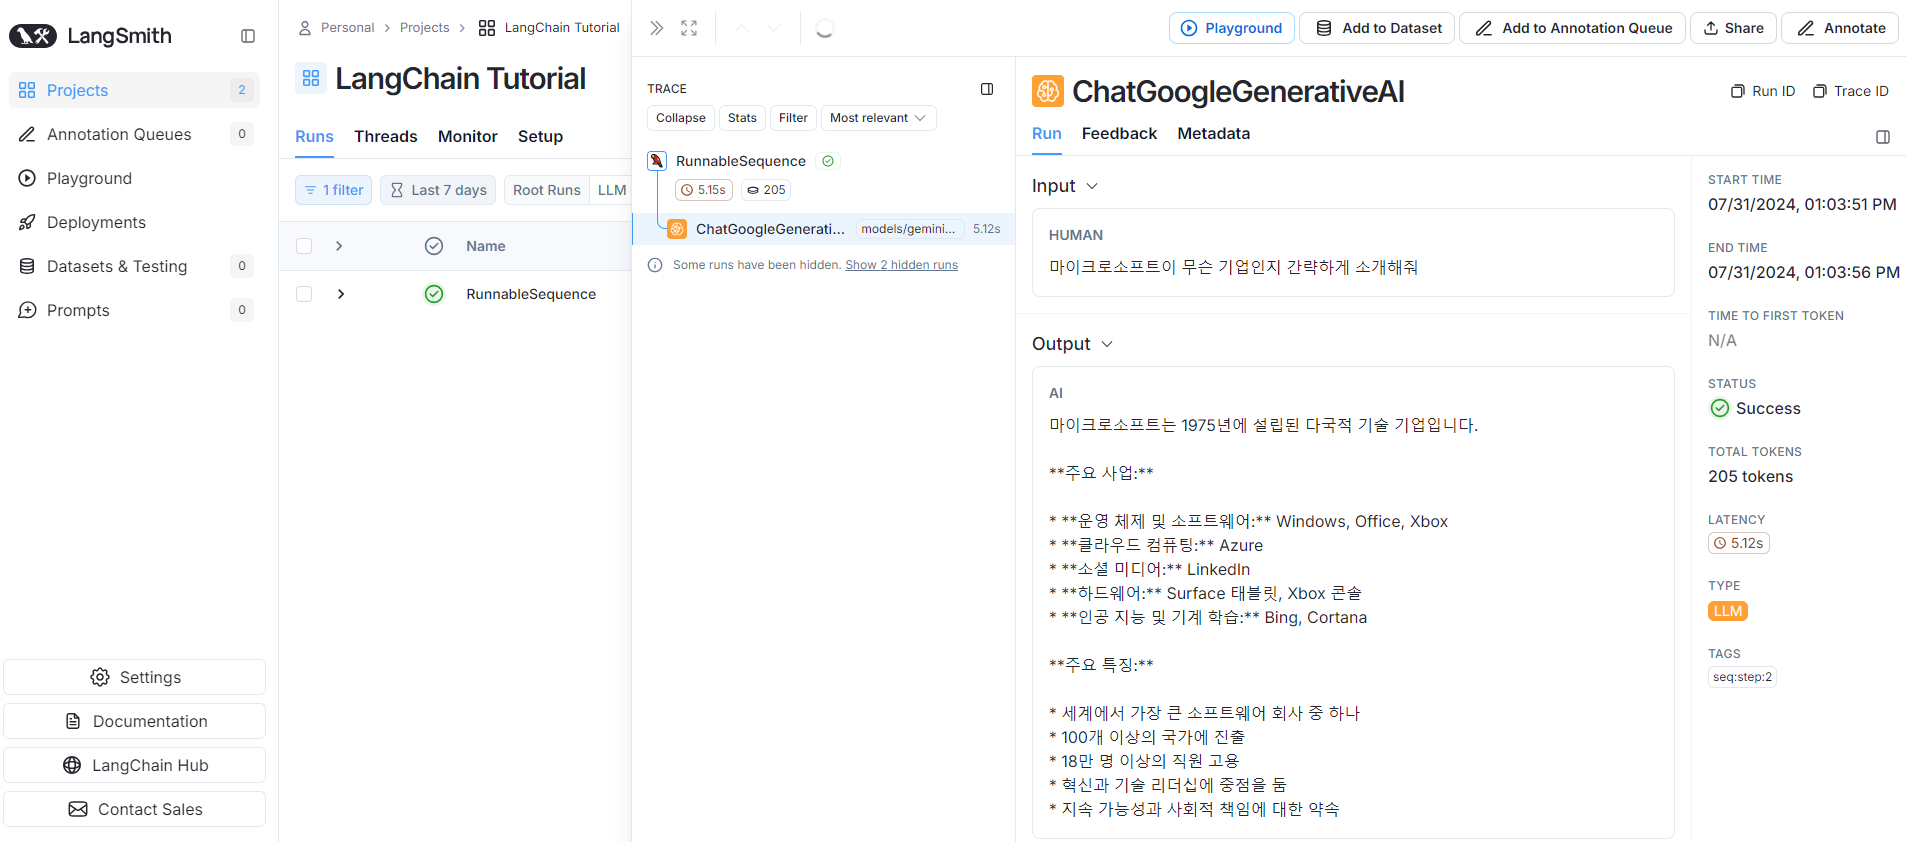

- `RunnablePassthrough`는 입력을 변경하지 않거나 추가 키를 더하여 전달할 수 있다.
- `RunnablePassthrough()`가 단독으로 호출되면, 단순히 입력을 받아 그대로 전달한다.
- `RunnablePassthrough.assign(...)` 방식으로 호출되면, 입력을 받아 assign 함수에 전달된 추가 인수를 추가한다.
  

## RunnablePassthrough

In [105]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

llm = ChatGoogleGenerativeAI(model="gemini-pro",# 모델 종류
                             temperature=0.2, # 창의성 정도 0~1
                            )

template = '{company}(이)가 무슨 사업으로 돈을 버는지 설명해줘'
prompt = PromptTemplate(template=template, input_variables=['company'])
output_parser = StrOutputParser()

# 연결된 체인(Chain)객체 생성
llm_chain = prompt | llm | output_parser

# invoke() 시 딕셔너리 형태로 인자 전달
print(llm_chain.invoke({'company': '엔비디아'}))

엔비디아는 다음과 같은 사업으로 돈을 벌고 있습니다.

**그래픽 처리 장치(GPU)**

* **게이밍:** 게이머를 위한 고성능 그래픽 카드
* **데이터 센터:** 클라우드 컴퓨팅, 인공 지능(AI), 머신 러닝을 위한 GPU
* **프로페셔널 비주얼라이제이션:** 엔지니어링, 디자인, 미디어 제작을 위한 GPU

**네트워킹**

* **데이터 센터 스위치:** 클라우드 컴퓨팅 및 엔터프라이즈 네트워크를 위한 고속 네트워킹 장비
* **네트워크 인터페이스 카드(NIC):** 서버와 네트워크를 연결하는 고성능 어댑터

**AI 소프트웨어**

* **CUDA:** GPU 프로그래밍을 위한 병렬 컴퓨팅 플랫폼
* **TensorRT:** AI 추론을 최적화하는 최적화 엔진
* **DeepStream:** 비디오 분석 및 처리를 위한 소프트웨어 개발 키트

**자율 주행**

* **DRIVE Orin:** 자율 주행 차량을 위한 고성능 컴퓨팅 플랫폼
* **DRIVE Hyperion:** 자율 주행 차량을 위한 센서 및 소프트웨어 스택

**기타**

* **라이선스 및 로열티:** 엔비디아의 기술 사용에 대한 라이선스 및 로열티 수익
* **서비스:** 클라우드 컴퓨팅, 기술 지원, 교육 서비스


템플릿 변수가 하나인 경우 값만 전달하는 것 또한 가능하다.